# dataset

In [81]:
import os
import cv2
import matplotlib.pyplot as plt

mask_path='/media/sdb/CVDataset/ObjectSegmentation/DAVIS/Annotations/480p/bear/00000.png'
#mask_path='/media/sdb/CVDataset/ObjectSegmentation/DAVIS/Annotations/480p/bmx-bumps/00074.png'
mask=cv2.imread(mask_path,0)
print(np.unique(mask))
points=cv2.findNonZero(mask)
rect=cv2.boundingRect(points)
x1,y1,w,h=rect
crop_mask=mask[y1:y1+h,x1:x1+w]
resize_mask=cv2.resize(crop_mask,(320//2,240//2),interpolation=cv2.INTER_NEAREST)
print(np.unique(resize_mask))

[ 0 38]
[ 0 38]


In [82]:
print(rect)

min_x=None
max_x=None
min_y=None
max_y=None
for s1 in points:
    for (x,y) in s1:
        if min_x is None:
            min_x=x
            max_x=x
            min_y=y
            max_y=y
        else:
            min_x=min(x,min_x)
            max_x=max(x,max_x)
            min_y=min(y,min_y)
            max_y=max(y,max_y)

print(min_x,max_x,min_y,max_y) 
print(min_x,min_y,max_x-min_x,max_y-min_y)

print(mask.shape)
print(crop_mask.shape)
print(resize_mask.shape)

(96, 214, 369, 221)
96 464 214 434
96 214 368 220
(480, 854)
(221, 369)
(120, 160)


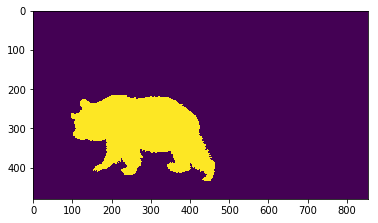

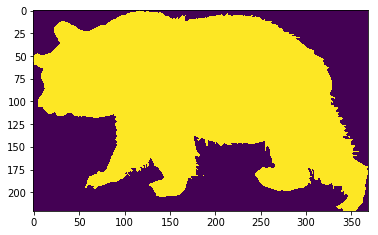

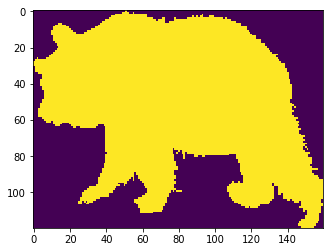

In [84]:
plt.imshow(mask)
plt.show()

plt.imshow(crop_mask)
plt.show()

plt.imshow(resize_mask)
plt.show()

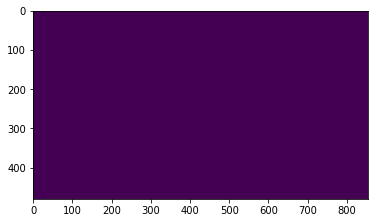

(0, 0, 0, 0)


In [28]:
mask_path='/media/sdb/CVDataset/ObjectSegmentation/DAVIS/Annotations/480p/bmx-bumps/00074.png'
mask=cv2.imread(mask_path,0)
plt.imshow(mask)
plt.show()

points=cv2.findNonZero(mask)
rect=cv2.boundingRect(points)
x1,y1,w,h=rect
print(rect)

no checkpoint file given, auto find /home/yzbx/tmp/logs/vggstyle_homo/cocostuff/basic/2018-12-05___23-12-51/model-last-100.pkl
load checkpoint file from /home/yzbx/tmp/logs/vggstyle_homo/cocostuff/basic/2018-12-05___23-12-51/model-last-100.pkl
cocostuff test dataset image size is 1000


mean corner error is 14.329460013657808


mean corner error is 13.42519972473383


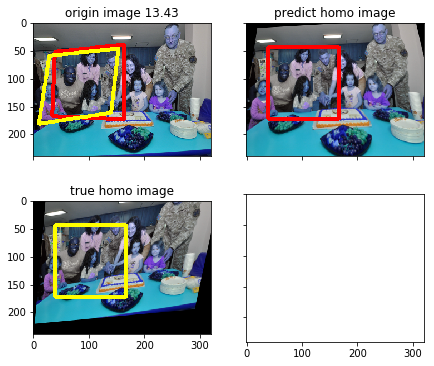

mean corner error is 14.868483670055866


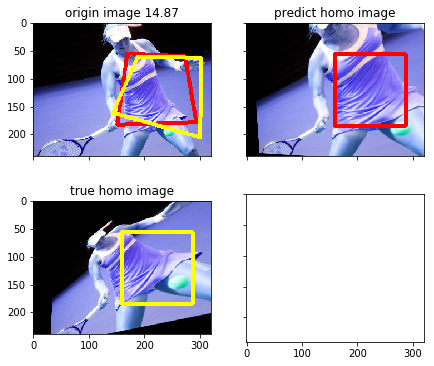

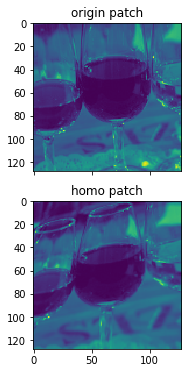

mean corner error is 12.977873384952545


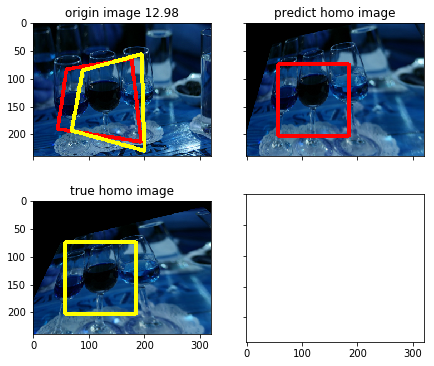

mean corner error is 11.409372359514236


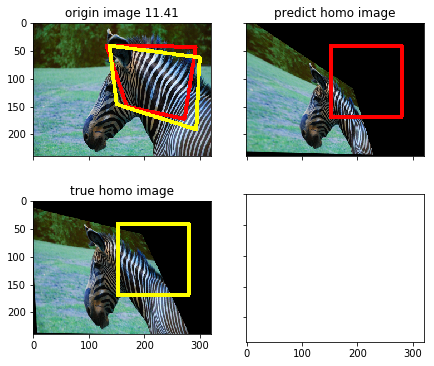

mean corner error is 16.86143295094371


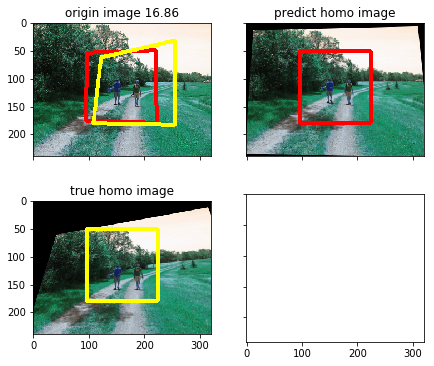

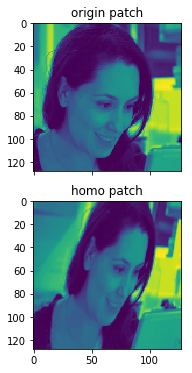

mean corner error is 17.068523064255714


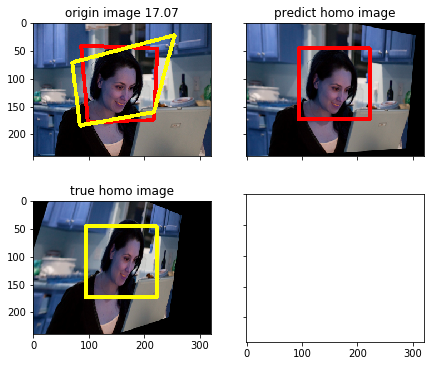

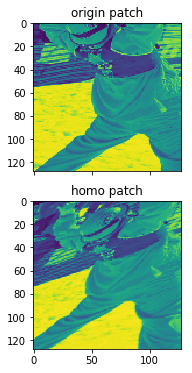

mean corner error is 13.053831085562706


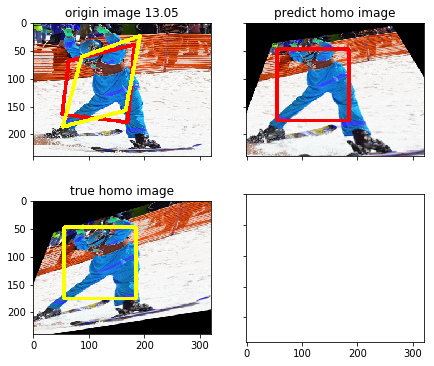

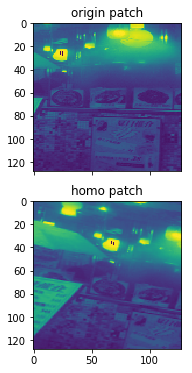

mean corner error is 12.277180403470993


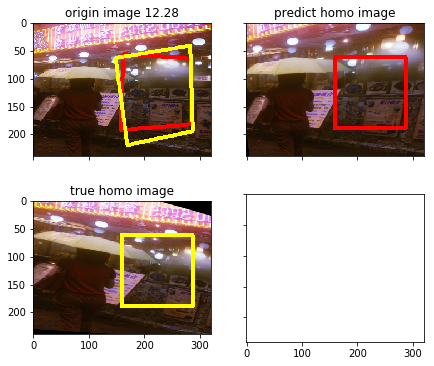

mean corner error is 17.855345264077187


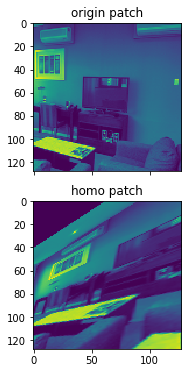

mean corner error is 12.344228297472


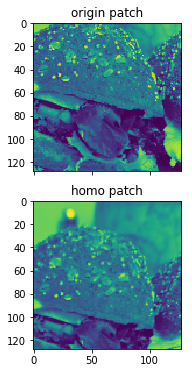

mean corner error is 14.321507960557938


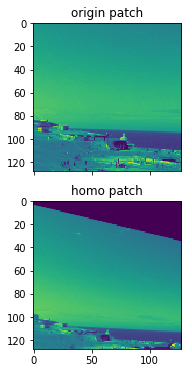

mean corner error is 11.50033450871706


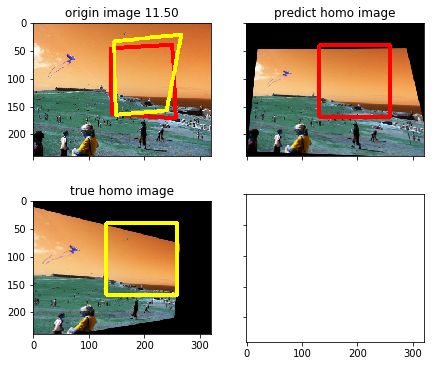

mean corner error is 10.340634256601334


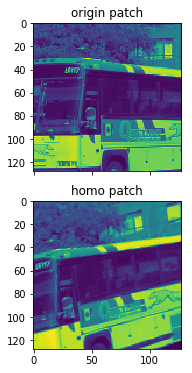

mean corner error is 18.41940962523222


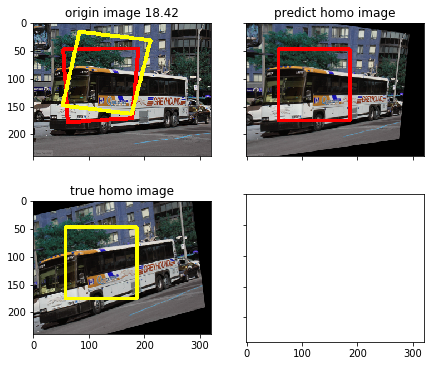

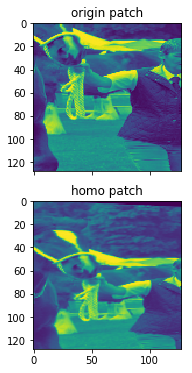

mean corner error is 10.648981660604477


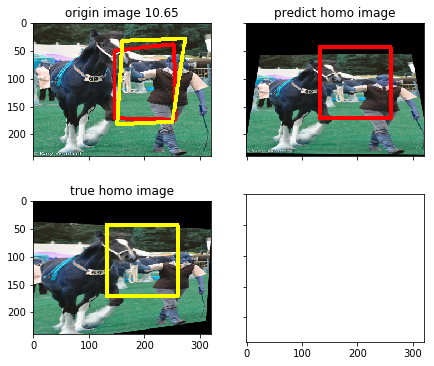

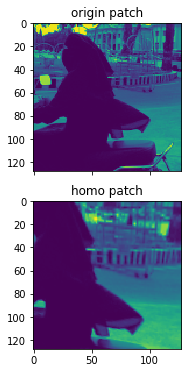

mean corner error is 15.2196094840765


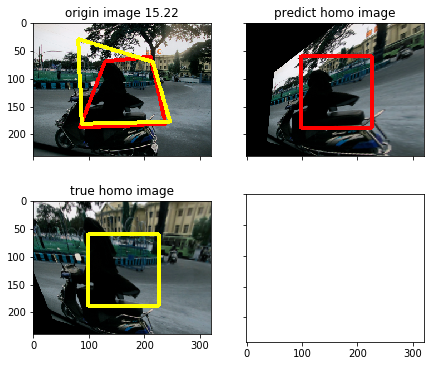

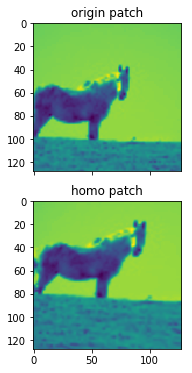

mean corner error is 12.34171700105071


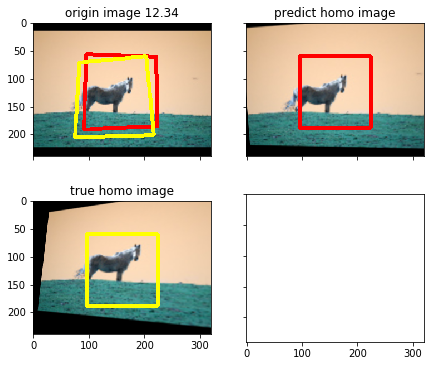

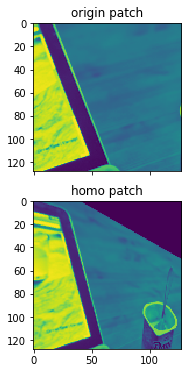

mean corner error is 8.493788123130798


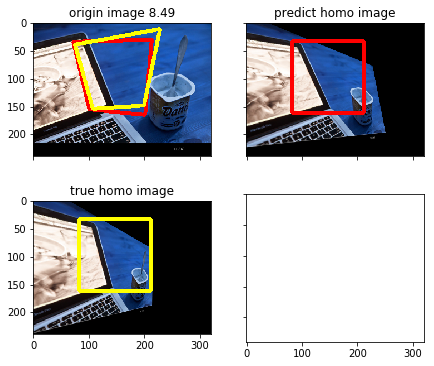

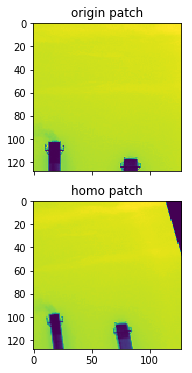

mean corner error is 17.147135823965073


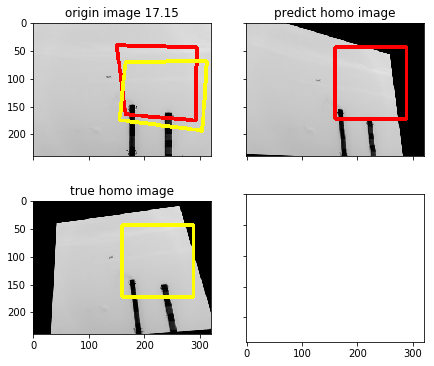

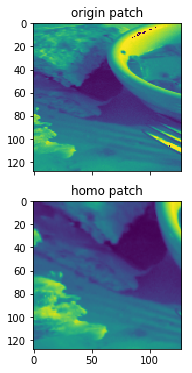

mean corner error is 19.090597987174988


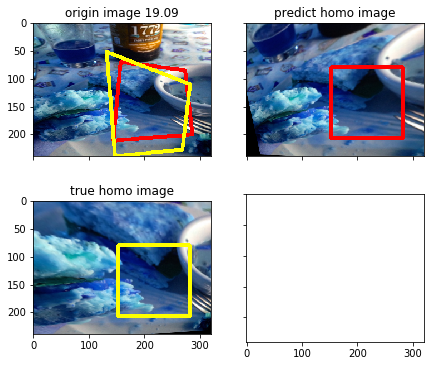

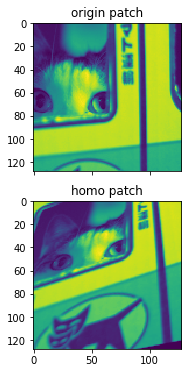

mean corner error is 17.34925001114607


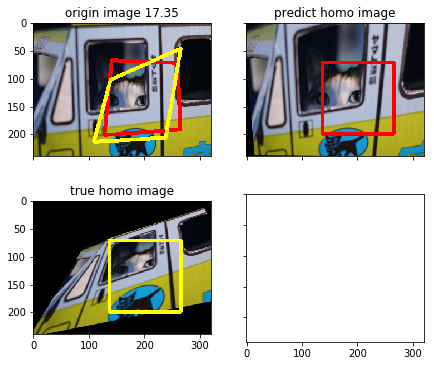

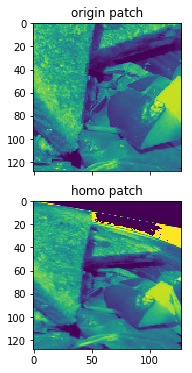

mean corner error is 7.4172103703022


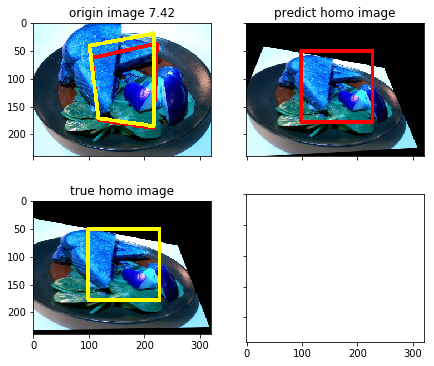

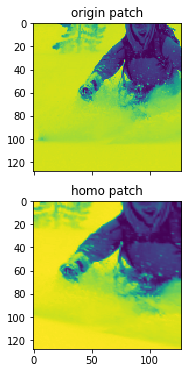

mean corner error is 17.731497541069984


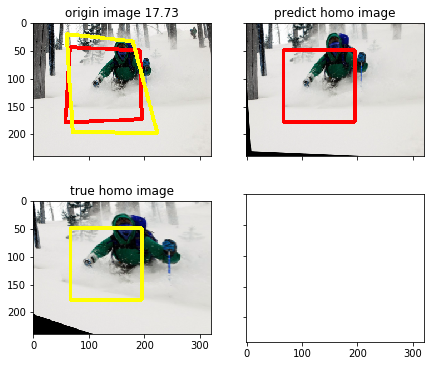

mean corner error is 17.395829759538174


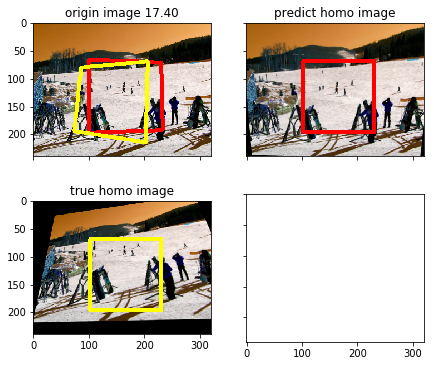

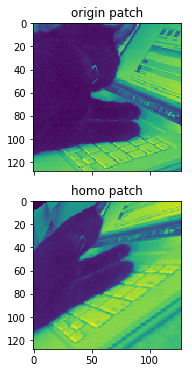

mean corner error is 12.384790904819965


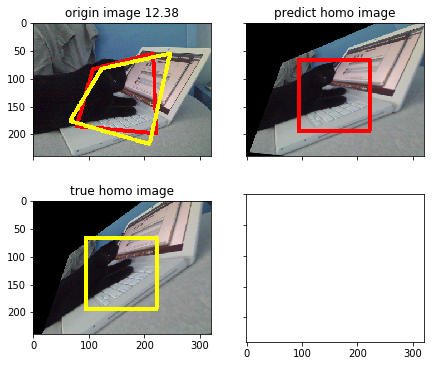

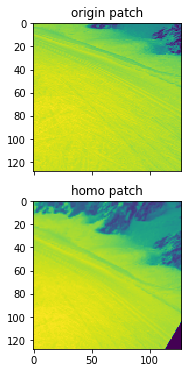

mean corner error is 20.893592566251755


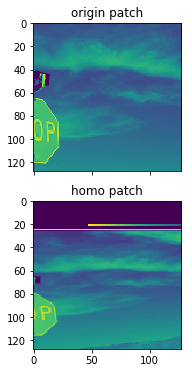

mean corner error is 14.583130717277527


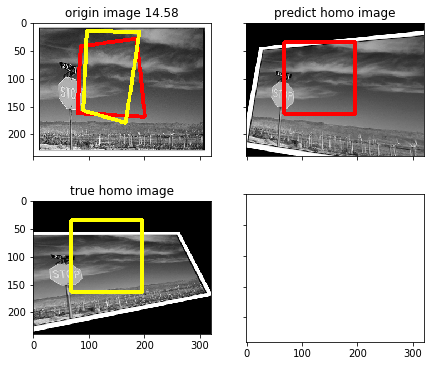

mean corner error is 15.615174055099487


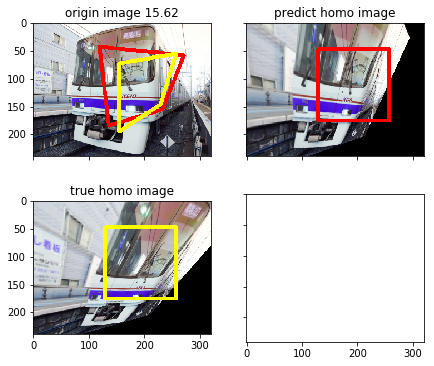

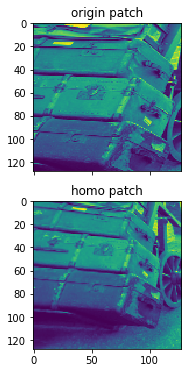

mean corner error is 19.085112988948822


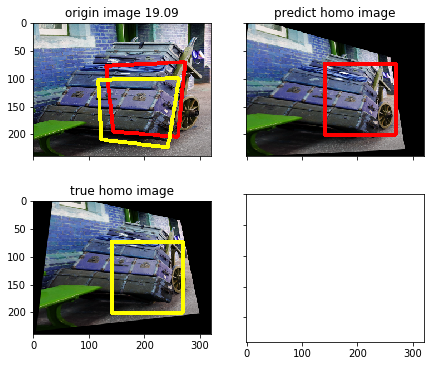

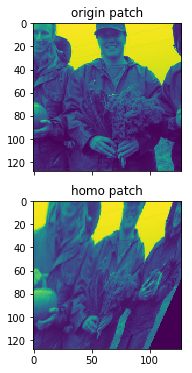

mean corner error is 11.543738305568695


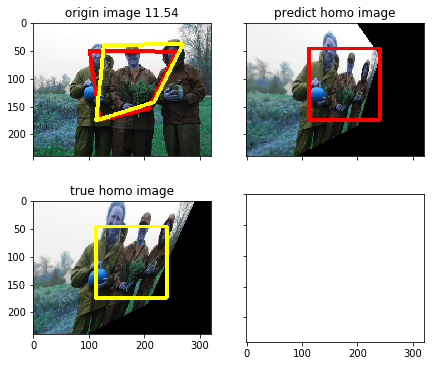

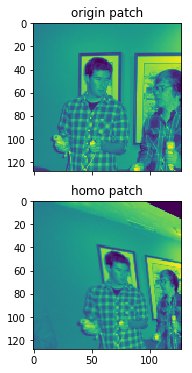

mean corner error is 9.718947604298592


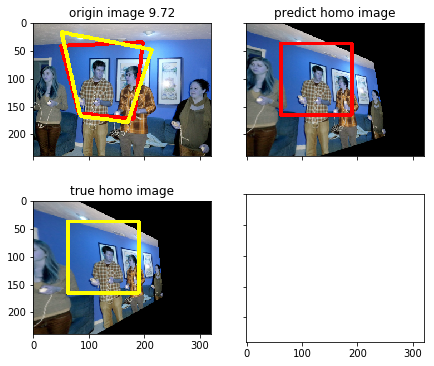

In [2]:
from train import get_parser
from test import show_offset
from dataset.dataset import dataset
import torch.utils.data as TD
from utils.train_tools import get_ckpt_path,get_model
from utils.disc import show_images,point_yx2xy
import torch
import os

os.chdir(os.path.expanduser('~/git/torch_homograph'))
#argv='--use_mask=True --note=mask'
argv='--use_mask=False --note=basic'
parser=get_parser()
args=parser.parse_args(argv.split(' '))
log_dir=os.path.join(args.log_dir,args.model_name,args.patch_dataset,args.note)
ckpt_path = get_ckpt_path(log_dir)
print('load checkpoint file from', ckpt_path)
state_dict = torch.load(ckpt_path)

model=get_model(args)    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

if 'model_state' in state_dict.keys():
    model.load_state_dict(state_dict['model_state'])
else:
    model.load_state_dict(state_dict)

val_loader=TD.DataLoader(dataset=dataset(args,split='test'),
                           batch_size=args.batch_size,
                           shuffle=True,
                           drop_last=True,
                           num_workers=2)

model.eval()
for idx,(datas) in enumerate(val_loader):
    imgs=datas['imgs'].to(device).float()
    points_offset=32*datas['points_offset'].data.cpu().numpy()
    points_perturb_true=datas['points_perturb'].data.cpu().numpy()
    img_path=datas['img_path']

    outputs=32*model.forward(imgs)

    show_offset(imgs,img_path,points_offset,points_perturb_true,outputs)

    points_offset_predict=outputs.data.cpu().numpy()
    mean_corner_error=np.mean(np.abs(points_offset_predict-points_offset))
    break

In [4]:
print(points_offset)
print(outputs)

[[ -5.  -2. -30.  -5. -27. -25.   1. -29.]
 [ 15. -10.   9. -29. -11. -27.   2. -14.]
 [  5.  29. -23. -16.  21.  13.   7.  15.]
 [ 11.  32.  -9.  12.  27.  15. -18.  10.]
 [  0. -15. -23.  -2.  22.  13.  21.  19.]
 [ 11.  26.   1.  12.   4.  31. -19.  30.]
 [ 26. -24.  11. -10. -13.  -5. -23.  32.]
 [ 14.  31.  11.  -3. -18. -18. -24.   8.]
 [  2. -11.  30.  10.   5.   0. -20.  -5.]
 [-30.  -1. -16.  27. -20.  15. -11.  30.]
 [ 23.  32.  20. -14.  -9.  20. -15. -19.]
 [ -3.  23.  22.  26. -23.  17.   6.  19.]
 [ -7.  14.  -3.  17. -11. -19. -19.   7.]
 [  2. -25. -10.   1.   2.  -5.   1. -32.]
 [-31.  25. -27.  -5. -12.  -9. -16.  25.]
 [-11.  28.  11.  19.   6. -10. -15.  13.]
 [-31. -17.  -7. -11. -11.  20.  10. -11.]
 [ 11. -13.  17. -21.  13.  -7.   0. -21.]
 [  6.  -8.  -7.  24. -13. -12. -22.  17.]
 [ 26.   6.   2.  -5.  21.  16.  25.  24.]
 [-27. -21.  32.  -6.  20. -13.  31.   1.]
 [ 31.   2.  14. -28.   7. -27. -25.   0.]
 [ -9.   2.  -7.  18.   7. -10. -31. -10.]
 [-29.  -7.